# CNN for seismic facies classification

## Imports and dataset loading

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from livelossplot.keras import PlotLossesCallback
from sklearn.metrics import confusion_matrix
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


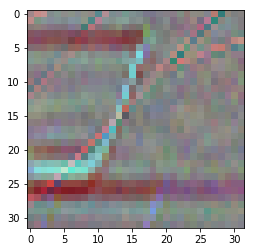

In [19]:

with h5py.File('gdrive/My Drive/UFSC/TCC/stanford6_rgb.h5', 'r') as dataset:
  x_train_original = np.array(dataset['X']).T
  y_train_original = np.array(dataset['Y'])
  
num_classes = 4
  
plt.imshow(x_train_original[0])

In [0]:
x_train = x_train_original
y_train = keras.utils.to_categorical(y_train_original, num_classes)

In [25]:
input_shape = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
activation_2 (Activat

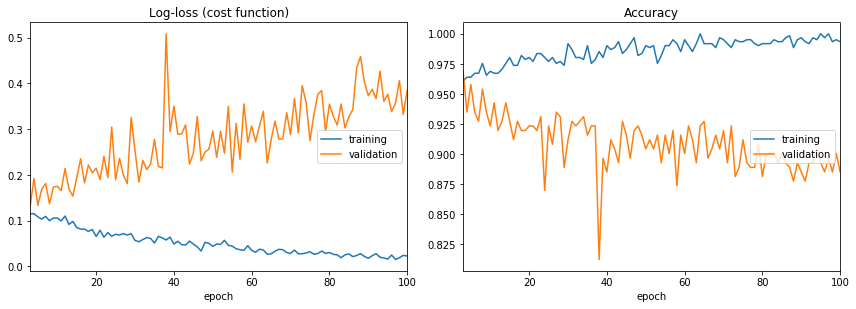

Log-loss (cost function):
training   (min:    0.015, max:    0.147, cur:    0.023)
validation (min:    0.132, max:    0.509, cur:    0.385)

Accuracy:
training   (min:    0.944, max:    1.000, cur:    0.993)
validation (min:    0.812, max:    0.969, cur:    0.885)


In [51]:
batch_size = 16
epochs = 100

history = model.fit(
    
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3,
    shuffle=True,
    callbacks=[PlotLossesCallback()]
)

In [52]:
scores = model.evaluate(x_train, y_train, verbose=1)
for i, score in enumerate(scores):
    print(f'Test {model.metrics_names[i]}: {score}')

870/870 [==============================] - 1s 839us/step
Test loss: 0.11869220703769336
Test acc: 0.9655172413793104


[[539   1   0   3]
 [  0  73   0   0]
 [  7  10 170   2]
 [  4   2   1  58]]


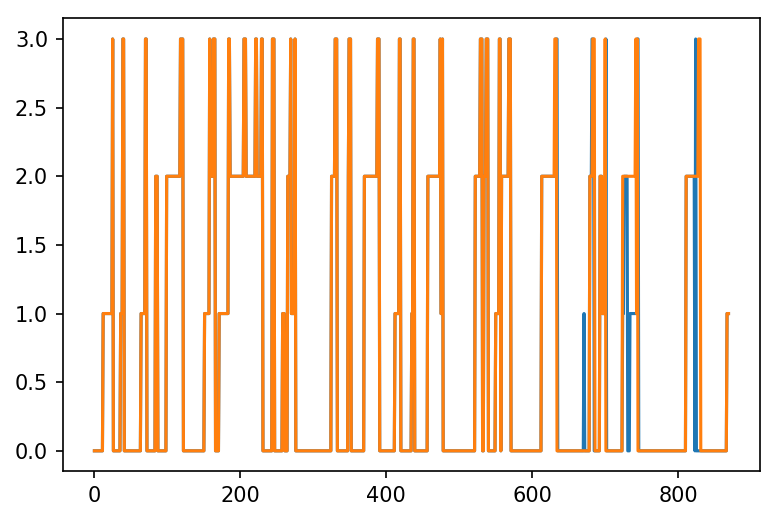

In [58]:
predict = model.predict(x_train)
predict_class = np.argmax(predict, axis=1)

plt.figure(dpi=150)
plt.plot(predict_class)
plt.plot(y_train_original)

matrix = confusion_matrix(y_train_original, predict_class)
print(matrix)